<h1><center> Credit Card Fraud Detection </center></h1> 

<h2><center> Chapter 3 : Modeling </center></h2> 

## Content


The goal of this project to develop a best suited algorithm to find the outliers or frauds in case of credit cards. We will implement several machine learning and deep learning algorithms and compare them and choose the best algorithm.
We will implement algorithms like:

1. Neural Network
2. Logistic Regression 
3. K-Means


In [1]:
!pip install --upgrade keras-applications keras-preprocessing setuptools tensorflow==1.14.0 keras==2.2.5

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20200322110207-0000
KERNEL_ID = c02b7be0-89ee-4e5a-bd18-597c88fb962b
    100% |################################| 51kB 1.4MB/s ta 0:00:011
    100% |################################| 51kB 1.8MB/s eta 0:00:01
    100% |################################| 583kB 3.3MB/s eta 0:00:01
    100% |################################| 109.2MB 206kB/s eta 0:00:01 1% |                                | 1.6MB 21.8MB/s eta 0:00:05
    100% |################################| 337kB 4.1MB/s eta 0:00:01
    100% |################################| 20.2MB 772kB/s eta 0:00:01
    100% |################################| 2.9MB 2.2MB/s eta 0:00:01
    100% |################################| 61kB 2.0MB/s eta 0:00:01
    100% |################################| 3.2MB 2.4MB/s eta 0:00:01
    100% |################################| 491kB 3.1MB/s eta 0:00:01
    100% |################################| 1.3MB 2.8MB/s eta 0:00:01
    100% 

In [2]:
import tensorflow
if not tensorflow.__version__ == '1.14.0':
    print(tensorflow.__version__)
    raise ValueError('please upgrade to TensorFlow 1.14.0, or restart your Kernel (Kernel->Restart & Clear Output)')

import keras
if not keras.__version__ == '2.2.5':
    print(keras.__version__)
    raise ValueError('please upgrade to Keras 2.2.5, or restart your Kernel (Kernel->Restart & Clear Output)')

Using TensorFlow backend.


### Importing Needed packages

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans 

from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


In [4]:
# Import Data into IBM's Watson Studio

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_84b0ff1823ab47db8f9e6aaaf1af72b0 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='JEMi_wmafQCsJME_C0BjJpnQSoDSi6xu9VgwHGN8I8FO',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_84b0ff1823ab47db8f9e6aaaf1af72b0.get_object(Bucket='courseraml-donotdelete-pr-lavjj7apvyxhwu',Key='creditcard.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

ccfd = pd.read_csv(body)

# Remove the column 'Time' and standardize the variable 'Amount'
ccfd_stand = ccfd.drop(['Time'], axis=1)
ccfd_stand['Amount'] = StandardScaler().fit_transform(ccfd_stand['Amount'].values.reshape(-1, 1))

## Implementation

### 1. Artificial Neural Network

In this part of the series, we will train an Artificial Neural Network, implemented in Keras in unsupervised (or semi-supervised) fashion for fraud detection in credit card transaction data. 



In [5]:
#seperating the X and the Y from the dataset
X = ccfd_stand.drop(['Class'], axis=1)
Y = ccfd_stand["Class"]
print(X.shape)
print(Y.shape)

#getting just the values for the sake of processing (its a numpy array with no columns)
X_data=X.values
Y_data=Y.values

X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)

(284807, 29)
(284807,)


In [8]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units =16 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 29))

# Adding the second hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu'))

# Dropout
Dropout(0.5)

# Adding the third hidden layer
classifier.add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the fourth hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


In [9]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_7 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_8 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_9 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compiling model
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Saves the model weights after each epoch if the validation loss decreased
checkpointer = ModelCheckpoint(filepath = "model.h5", verbose = 1, save_best_only = True)

# Fitting the model to the Training set
history = classifier.fit(X_train, y_train, validation_split =0.2, batch_size = 50, epochs = 100, callbacks = [checkpointer])

# list all data in history
print(history.history.keys())



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 182276 samples, validate on 45569 samples
Epoch 1/100
182276/182276 [==============================] - 8s 46us/step - loss: 0.0179 - acc: 0.9980 - val_loss: 0.0038 - val_acc: 0.9981

Epoch 00001: val_loss improved from inf to 0.00376, saving model to model.h5
Epoch 2/100
182276/182276 [==============================] - 7s 40us/step - loss: 0.0036 - acc: 0.9990 - val_loss: 0.0035 - val_acc: 0.9993

Epoch 00002: val_loss improved from 0.00376 to 0.00347, saving model to model.h5
Epoch 3/100
182276/182276 [==============================] - 7s 41us/step - loss: 0.0033 - acc: 0.9994 - val_loss: 0.0032 - val_acc: 0.9994

Epoch 00003: val_loss improved from 0.00347 to 0.00316, saving model to model.h5
Epoch 4/100
182276/182276 [==============================] - 7s 41us/step - loss: 0.0030 - acc: 0.9994 - val_loss: 0.0029 - val_acc: 0.9994

Epoch 00004: val_loss improved from 0.00316 to 0.00287, saving model to model.h5
Epoch 5/100
182276/182276 [==============================] - 7s 4

And load the saved model (just to check if it works):

In [13]:
classifier = load_model('model.h5')

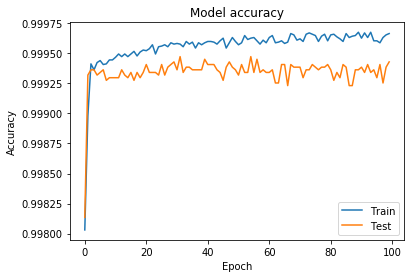

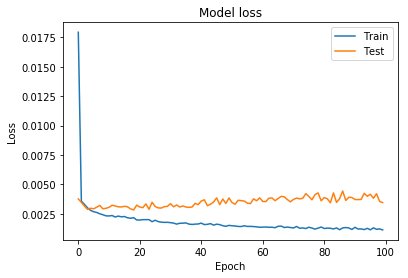

In [15]:
# Evaluation

# Plot history for accuracy

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

# Plot history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

The reconstruction error on our training and test data seems to converge nicely.

In [16]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [17]:
score = classifier.evaluate(X_test, y_test)
score

56962/56962 [==============================] - 1s 21us/step


[0.002757571639226876, 0.999403110845827]

In [19]:
# Error distribution
mse = np.mean(np.power(X_test - y_pred, 2), axis=1)

error_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': y_test})
error_df.describe()

,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,1.089012,0.001720
std,3.922905,0.041443
min,0.148072,0.000000
25%,0.422480,0.000000
50%,0.632098,0.000000
75%,0.970306,0.000000
max,275.041239,1.000000


In [20]:
#Let's see how our model performed
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.80      0.82        98

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.92      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962



Test Data Accuracy: 0.9994


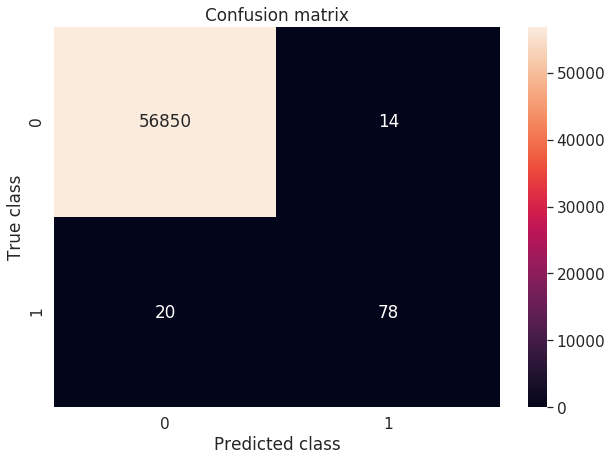

In [21]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

### 2. Logistic Regression

In this part of the series, we will train a Logistic Regression model with Scikit-learn

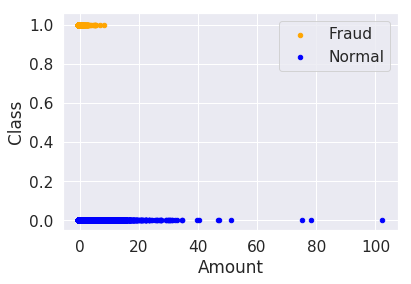

In [55]:
Fraud = ccfd_stand[ccfd_stand['Class'] == 1]
Normal = ccfd_stand[ccfd_stand['Class'] == 0]

ax = Fraud.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
Normal.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()

In [56]:
# Logistic Regression model
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [57]:
#Prediction
y_pred_log = LR.predict(X_test)

# Accuracy
print("Test Data Accuracy (Score): %0.5f" % accuracy_score(y_test, y_pred_log))

#Let's see how our model performed
print(classification_report(y_test, y_pred_log))

Test Data Accuracy (Score): 0.99909
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.56      0.68        98

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.93      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962



Test Data Accuracy (Score): 0.99909


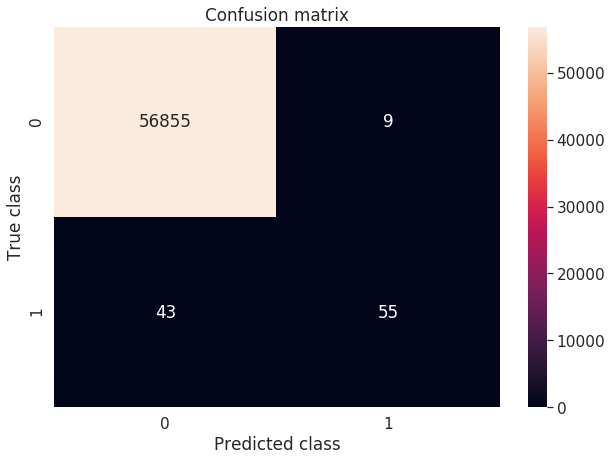

In [58]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
print("Test Data Accuracy (Score): %0.5f" % accuracy_score(y_test, y_pred_log))

### 3. K-Means

In this part of the series, we will train a K-Means model with Scikit-learn

In [62]:
# M-Means algorithm
clusterNum = 2
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 50)
k_means.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=50, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [63]:
#Prediction
y_pred_kmeans = k_means.predict(X_test)

# Accuracy
print("Test Data Accuracy (Score): %0.5f" % accuracy_score(y_test, y_pred_kmeans))

#Let's see how our model performed
print(classification_report(y_test, y_pred_kmeans))

Test Data Accuracy (Score): 0.52577
              precision    recall  f1-score   support

           0       1.00      0.53      0.69     56864
           1       0.00      0.18      0.00        98

   micro avg       0.53      0.53      0.53     56962
   macro avg       0.50      0.36      0.35     56962
weighted avg       1.00      0.53      0.69     56962



Test Data Accuracy: 0.52577


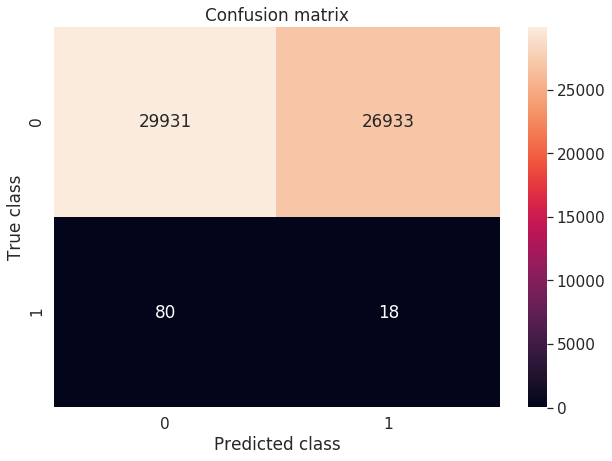

In [64]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_kmeans) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
print("Test Data Accuracy: %0.5f" % accuracy_score(y_test, y_pred_kmeans))

## Conclusion

I've created a Deep Learning algorithm in Keras, a Clustering and a Classification Machine Learning algorithms that can reconstruct what non fraudulent transactions look like. The following table represents accuracy indices for the three algorithms :

| Algorithm           | Score   | f1-score | Precision | Recall |
|---------------------|---------|----------|-----------|--------|
| Neural Network      | 0.9994  |  0.91    |   0.92    |  0.90  |
| Logistic Regression | 0.9991  |  0.84    |   0.93    |  0.78  |        
| K-Means             | 0.5257  |  0.35    |   0.36    |  0.50  |


It's quite clear that Artificial Neural Networks are more performant than other Machine Learning algorithms...